In [39]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from sklearn.model_selection import cross_val_score

In [40]:
data = load_breast_cancer()
data.target[[10, 50, 85]]
list(data.target_names)
['malignant', 'benign']

['malignant', 'benign']

In [41]:
cancer = load_breast_cancer()
cancer_df=pd.DataFrame(cancer.data,columns=cancer.feature_names)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [42]:
cancer_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [43]:
data_corr = cancer_df.corr()

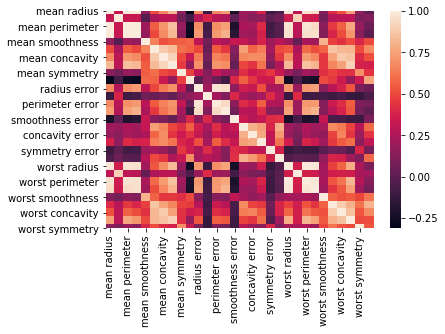

In [44]:
sns.heatmap(data_corr)
plt.show()

In [111]:
dataset = datasets.load_breast_cancer()

X = dataset.data
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [113]:
# Build Model
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)

# Fit
logreg.fit(X_train, y_train)

logreg.coef_[0]
logreg.intercept_[0]

# Predict
y_pred_class = logreg.predict(X_test)

# save confusion matrix and slice into four pieces
confusion = confusion_matrix(y_test, y_pred_class)
print(confusion)

#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[37  5]
 [ 1 71]]


In [114]:
# use float to perform true division, not integer division
print("Accuracy Score: ", accuracy_score(y_test, y_pred_class))

classification_error = (FP + FN) / (TP + TN + FP + FN)
print("Classification_error: ", classification_error)

sensitivity = TP / (FN + TP)
print("Sensitivity: ", sensitivity)

specificity = TN / (TN + FP)
print("Specificity: ", specificity)

false_positive_rate = FP / (TN + FP)
print("FP Rate: ", false_positive_rate)

Accuracy Score:  0.9473684210526315
Classification_error:  0.05263157894736842
Sensitivity:  0.9861111111111112
Specificity:  0.8809523809523809
FP Rate:  0.11904761904761904


In [115]:
# Generate the prediction values for each of the test observations
# using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:, 1]

# Store the false positive rate(fpr), true positive rate (TPR)
# in vectors for use in the graph
fpr, tpr, thr = roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate
# the graph with theis metric
roc_auc = auc(fpr, tpr)

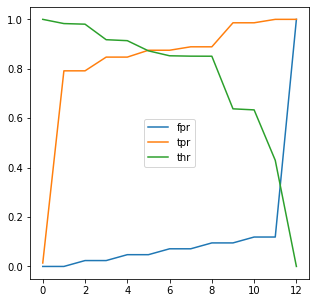

In [116]:
# thr
plt.figure(figsize=(5, 5))
plt.plot(range(len(thr)-1), fpr[1:], label='fpr')
plt.plot(range(len(thr)-1), tpr[1:], label='tpr')
plt.plot(range(len(thr)-1), thr[1:], label='thr')
plt.legend()
plt.show()

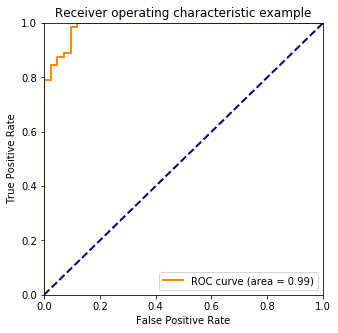

In [117]:
# Plot the ROC Curve
plt.figure(figsize=(5, 5))
lw = 2
plt.plot(fpr,
         tpr,
         color='darkorange',
         lw=lw,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1],
         [0, 1],
         color='navy',
         lw=lw,
         linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')
plt.show()

In [119]:
dataset = datasets.load_breast_cancer()
feature_cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error']

X = cancer_df[feature_cols]
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1)

In [122]:
logreg = LogisticRegression(solver='lbfgs', max_iter = 1000)

In [123]:
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
logreg.coef_[0]

array([ 1.26057736, -0.27727921, -0.59807033,  0.02296176, -0.33062671,
       -0.44677855, -0.98462298, -0.50214037, -0.51261962, -0.06005052,
        0.36197609,  1.02426355,  0.51498448, -0.1216285 ,  0.00245053,
        0.21649954,  0.17437535,  0.02599268,  0.06017732,  0.05068538])

In [125]:
logreg.intercept_[0]

30.396836681911058

In [126]:
m1=sm.Logit(y,X)

X = cancer_df[feature_cols]
y = dataset.target
m1
m1.fit()

m1.fit().summary2()

Optimization terminated successfully.
         Current function value: 0.079077
         Iterations 14
Optimization terminated successfully.
         Current function value: 0.079077
         Iterations 14


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
=============================================================================
Model:                   Logit               Pseudo R-squared:    0.880      
Dependent Variable:      y                   AIC:                 129.9897   
Date:                    2019-11-16 13:08    BIC:                 216.8673   
No. Observations:        569                 Log-Likelihood:      -44.995    
Df Model:                19                  LL-Null:             -375.72    
Df Residuals:            549                 LLR p-value:         5.2242e-128
Converged:               1.0000              Scale:               1.0000     
No. Iterations:          14.0000                                             
-----------------------------------------------------------------------------
                          Coef.   Std.Err.    z    P>|z|    [0.025    0.975] 
-----------------------------------------------------------------------------
mean radius               -2.6105   6.0418 -0.4321 0.6657  -14.4522    9.2311
mean texture              -0.5184   0.1063 -4.8776 0.0000   -0.7267   -0.3101
mean perimeter             1.0652   0.9064  1.1752 0.2399   -0.7114    2.8418
mean area                 -0.0513   0.0163 -3.1496 0.0016   -0.0833   -0.0194
mean smoothness          -31.0956  56.3761 -0.5516 0.5812 -141.5906   79.3994
mean compactness          27.1985  42.5986  0.6385 0.5232  -56.2931  110.6902
mean concavity          -106.6953  35.6383 -2.9938 0.0028 -176.5452  -36.8454
mean concave points      -56.9038  56.5727 -1.0059 0.3145 -167.7842   53.9767
mean symmetry            -40.6707  20.2162 -2.0118 0.0442  -80.2937   -1.0476
mean fractal dimension   -82.7824 121.3121 -0.6824 0.4950 -320.5497  154.9849
radius error              23.6558  16.9581  1.3950 0.1630   -9.5815   56.8931
texture error              2.1240   0.8850  2.4001 0.0164    0.3895    3.8585
perimeter error            0.4489   1.4095  0.3185 0.7501   -2.3137    3.2114
area error                -0.3789   0.1565 -2.4217 0.0154   -0.6856   -0.0722
smoothness error          16.0416 160.7112  0.0998 0.9205 -298.9467  331.0298
compactness error        -36.2202  65.0994 -0.5564 0.5779 -163.8126   91.3722
concavity error          105.6818  64.3778  1.6416 0.1007  -20.4963  231.8600
concave points error      23.2579 160.8979  0.1446 0.8851 -292.0963  338.6121
symmetry error            55.3851  65.8136  0.8415 0.4000  -73.6072  184.3774
fractal dimension error  500.9157 408.3006  1.2268 0.2199 -299.3388 1301.1702
=============================================================================

"""

In [127]:
y_pred_class = logreg.predict(X_train)
print('accuracy = %.4f' %
      accuracy_score(y_train, y_pred_class))

accuracy = 0.9275


In [65]:
y_pred_class = logreg.predict(X_test)
print('accuracy = %.4f' %
      accuracy_score(y_test, y_pred_class))

accuracy = 0.9386


In [66]:
prds = logreg.predict(X)
print(confusion_matrix(y_test, y_pred_class))

[[36  6]
 [ 1 71]]


In [67]:
df = pd.DataFrame({'Actual': y_test,
                   'Predict': y_pred_class})
df['Predict'][df['Actual'] == 0].sum()

6

In [68]:
# FN = Survived - (Predict_survived)
df[df['Actual'] == 1].shape[0] - df['Predict'][df['Actual'] == 1].sum()

1

In [69]:
logreg.predict_proba(X_test)[:10, 1]

array([0.88021686, 0.99263553, 0.88184879, 0.97981585, 0.94300748,
       0.86022624, 0.9845034 , 0.79270081, 0.96481962, 0.95391873])

In [70]:
#setting threshold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score
X, y = datasets.make_classification(
   n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
   n_features=20, n_samples=1000, random_state=10
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf = LogisticRegression(class_weight="balanced")
clf.fit(X_train, y_train)
THRESHOLD = 0.25
preds = np.where(clf.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)
pd.DataFrame(data=[accuracy_score(y_test, preds), recall_score(y_test, preds),
                  precision_score(y_test, preds), roc_auc_score(y_test, preds)], 
            index=["accuracy", "recall", "precision", "roc_auc_score"])

/Users/Liuyang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,0
accuracy,0.936364
recall,0.916667
precision,0.647059
roc_auc_score,0.927721


In [71]:
# Generate the prediction values for each of the test observations
# using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:, 1]

# Store the false positive rate(fpr), true positive rate (TPR)
# in vectors for use in the graph
fpr, tpr, thr = roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate
# the graph with theis metric
roc_auc = auc(fpr, tpr)

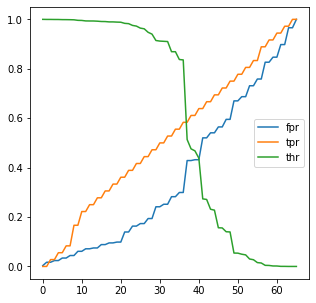

In [72]:
# thr
plt.figure(figsize=(5, 5))
plt.plot(range(len(thr)-1), fpr[1:], label='fpr')
plt.plot(range(len(thr)-1), tpr[1:], label='tpr')
plt.plot(range(len(thr)-1), thr[1:], label='thr')
plt.legend()
plt.show()

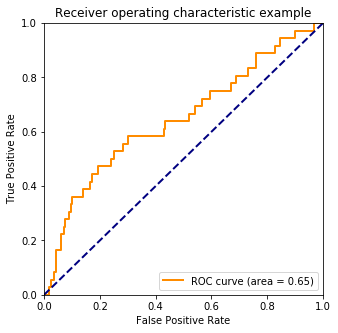

In [73]:
# Plot the ROC Curve
plt.figure(figsize=(5, 5))
lw = 2
plt.plot(fpr,
         tpr,
         color='darkorange',
         lw=lw,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1],
         [0, 1],
         color='navy',
         lw=lw,
         linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')
plt.show()

In [74]:
# Build Model
logreg = LogisticRegression(solver='lbfgs', max_iter=1000)

# Fit
logreg.fit(X_train, y_train)

# Predict
y_pred_class = logreg.predict(X_test)

# save confusion matrix and slice into four pieces
confusion = confusion_matrix(y_test, y_pred_class)
print(confusion)

#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[290   4]
 [  8  28]]


In [75]:
# use float to perform true division, not integer division
print((TP + TN) / (TP + TN + FP + FN))
print("Accuracy Score: ", accuracy_score(y_test, y_pred_class))

classification_error = (FP + FN) / (TP + TN + FP + FN)
print("Classification_error: ", classification_error)
print(1 - accuracy_score(y_test, y_pred_class))

sensitivity = TP / (FN + TP)
print("Sensitivity: ", sensitivity)
print(recall_score(y_test, y_pred_class))

specificity = TN / (TN + FP)
print("Specificity: ", specificity)

false_positive_rate = FP / (TN + FP)
print("FP Rate: ", false_positive_rate)
print(1 - specificity)

0.9636363636363636
Accuracy Score:  0.9636363636363636
Classification_error:  0.03636363636363636
0.036363636363636376
Sensitivity:  0.7777777777777778
0.7777777777777778
Specificity:  0.9863945578231292
FP Rate:  0.013605442176870748
0.013605442176870763


In [94]:
dataset = datasets.load_breast_cancer()
feature_cols = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension']

X = cancer_df[feature_cols]
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12345)

In [96]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.9}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.9}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

/Users/Liuyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.


Add  worst concave points           with p-value 1.96909971e-124
Add  worst radius                   with p-value 9.97179982e-24
Add  worst texture                  with p-value 3.39287414e-11
Add  worst area                     with p-value 1.65889399e-05
Add  smoothness error               with p-value 2.91154533e-07
Add  worst symmetry                 with p-value 3.43003556e-05
Add  compactness error              with p-value 0.00672452958
Add  radius error                   with p-value 0.00072695822
Add  worst fractal dimension        with p-value 0.0019580447
Add  mean compactness               with p-value 0.00456211152
Add  mean concave points            with p-value 0.00103855334
Drop compactness error              with p-value 0.0510578171
Add  fractal dimension error        with p-value 0.00583478865


/Users/Liuyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


resulting features:
['worst concave points', 'worst radius', 'worst texture', 'worst area', 'smoothness error', 'worst symmetry', 'radius error', 'worst fractal dimension', 'mean compactness', 'mean concave points', 'fractal dimension error']


In [104]:
feature_cols = ['worst concave points', 'worst radius', 'worst texture', 'worst area', 
                'smoothness error', 'worst symmetry', 'radius error', 'worst fractal dimension', 
                'mean compactness', 'mean concave points', 'fractal dimension error']
X = cancer_df[feature_cols]
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state=1)

logreg = LogisticRegression(solver='lbfgs', max_iter=2000)
logreg.fit(X_train, y_train)

y_pred_class = logreg.predict(X_train)
print('accuracy (train)= %.4f' %
      accuracy_score(y_train, y_pred_class))

y_pred_class = logreg.predict(X_test)
# Print the new accuracy rate
print('accuracy (test) = %.4f' %
      accuracy_score(y_test, y_pred_class))

accuracy (train)= 0.9577
accuracy (test) = 0.9231


In [105]:
# save confusion matrix and slice into four pieces
confusion = confusion_matrix(y_test, y_pred_class)
print(confusion)

#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[48  7]
 [ 4 84]]


In [106]:
# use float to perform true division, not integer division
print("Accuracy Score: ", accuracy_score(y_test, y_pred_class))

classification_error = (FP + FN) / (TP + TN + FP + FN)
print("Classification_error: ", classification_error)

sensitivity = TP / (FN + TP)
print("Sensitivity: ", sensitivity)

specificity = TN / (TN + FP)
print("Specificity: ", specificity)

false_positive_rate = FP / (TN + FP)
print("FP Rate: ", false_positive_rate)

Accuracy Score:  0.9230769230769231
Classification_error:  0.07692307692307693
Sensitivity:  0.9545454545454546
Specificity:  0.8727272727272727
FP Rate:  0.12727272727272726


In [107]:
m2=sm.Logit(y,X)
m2
m2.fit()

m2.fit().summary2()

Optimization terminated successfully.
         Current function value: 0.051922
         Iterations 15
Optimization terminated successfully.
         Current function value: 0.051922
         Iterations 15


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
=============================================================================
Model:                   Logit               Pseudo R-squared:    0.921      
Dependent Variable:      y                   AIC:                 81.0874    
Date:                    2019-11-16 13:05    BIC:                 128.8701   
No. Observations:        569                 Log-Likelihood:      -29.544    
Df Model:                10                  LL-Null:             -375.72    
Df Residuals:            558                 LLR p-value:         2.7514e-142
Converged:               1.0000              Scale:               1.0000     
No. Iterations:          15.0000                                             
-----------------------------------------------------------------------------
                          Coef.   Std.Err.    z    P>|z|    [0.025    0.975] 
-----------------------------------------------------------------------------
worst concave points     -55.9086  23.3352 -2.3959 0.0166 -101.6447  -10.1724
worst radius               5.6598   1.1347  4.9878 0.0000    3.4358    7.8839
worst texture             -0.3701   0.0902 -4.1038 0.0000   -0.5468   -0.1933
worst area                -0.0692   0.0137 -5.0491 0.0000   -0.0961   -0.0423
smoothness error        -353.1779 178.2323 -1.9816 0.0475 -702.5068   -3.8491
worst symmetry           -17.1673   7.9660 -2.1551 0.0312  -32.7805   -1.5542
radius error             -12.7140   3.2782 -3.8783 0.0001  -19.1392   -6.2887
worst fractal dimension -127.5334  60.6864 -2.1015 0.0356 -246.4767   -8.5902
mean compactness          37.5794  24.4976  1.5340 0.1250  -10.4350   85.5938
mean concave points      -93.0117  43.9130 -2.1181 0.0342 -179.0796   -6.9438
fractal dimension error 1250.2670 475.1565  2.6313 0.0085  318.9775 2181.5566
=============================================================================

"""

In [108]:
# Generate the prediction values for each of the test observations
# using predict_proba() function rather than just predict
preds = logreg.predict_proba(X_test)[:, 1]

# Store the false positive rate(fpr), true positive rate (TPR)
# in vectors for use in the graph
fpr, tpr, thr = roc_curve(y_test, preds)

# Store the Area Under the Curve (AUC) so we can annotate
# the graph with theis metric
roc_auc = auc(fpr, tpr)

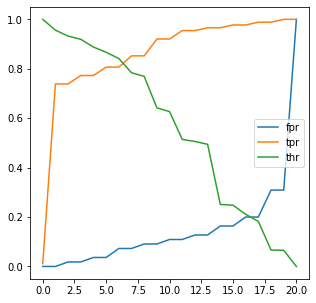

In [109]:
# thr
plt.figure(figsize=(5, 5))
plt.plot(range(len(thr)-1), fpr[1:], label='fpr')
plt.plot(range(len(thr)-1), tpr[1:], label='tpr')
plt.plot(range(len(thr)-1), thr[1:], label='thr')
plt.legend()
plt.show()

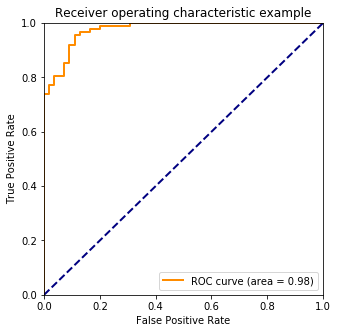

In [110]:
# Plot the ROC Curve
plt.figure(figsize=(5, 5))
lw = 2
plt.plot(fpr,
         tpr,
         color='darkorange',
         lw=lw,
         label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1],
         [0, 1],
         color='navy',
         lw=lw,
         linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc='lower right')
plt.show()